# Shopee Image Classification Competiiton

* The pre-trained neural network weights can be found at https://github.com/fchollet/deep-learning-models


In [2]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import csv

ImportError: cannot import name 'ResNet50' from 'tensorflow.python.keras.applications' (c:\users\tay\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\applications\__init__.py)

In [ ]:
# set the directories to the data sets
train_dir = r'C:\Users\tay.yq.XTRAMAN\Downloads\shopee dataset\train\train'
test_dir = r'C:\Users\tay.yq.XTRAMAN\Downloads\shopee dataset\test\test'

CLASS_NAMES = np.array(list(os.listdir(train_dir)))
CLASS_NAMES.sort()

# obtain the class names of the images, there are 42 classes in total, all numerical values
print(CLASS_NAMES)

In [15]:
num_classes = len(CLASS_NAMES)

In [16]:
NUM_FILES = []
for folder in os.listdir(train_dir):
  NUM_FILES.append(len(os.listdir(os.path.join(train_dir, folder))))

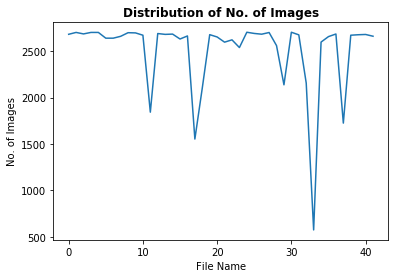

In [17]:
plt.plot(NUM_FILES)
plt.ylabel('No. of Images')
plt.xlabel('File Name')

plt.title('Distribution of No. of Images', fontweight='bold')

plt.show()

## Specify the model

In [20]:
resnet_weights_path = r'C:\Users\tay.yq.XTRAMAN\Downloads\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

my_new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 42)                86058     
Total params: 23,673,770
Trainable params: 86,058
Non-trainable params: 23,587,712
_________________________________________________________________


## Compile the model

In [21]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit the model

In [22]:
image_size = 224

data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2, preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        directory=str(train_dir),
        target_size=(image_size, image_size),
        batch_size=128,
        shuffle=True,
        class_mode='categorical',
        classes = list(CLASS_NAMES),
        subset='training')

validation_generator = data_generator.flow_from_directory(
        directory=str(train_dir),
        target_size=(image_size, image_size),
        shuffle=True,
        class_mode='categorical',
        classes = list(CLASS_NAMES),
        subset='validation')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        validation_data=validation_generator,
        validation_steps=1)

Found 84331 images belonging to 42 classes.
Found 21061 images belonging to 42 classes.
Instructions for updating:
Use tf.cast instead.
659/659 [==============================] - 19653s 30s/step - loss: 2.0735 - acc: 0.4676 - val_loss: 2.5584 - val_acc: 0.3182


## Prediction using the model

In [26]:
predictions_df = pd.read_csv(r'C:\Users\tay.yq.XTRAMAN\Downloads\shopee dataset\test.csv', header=0)

test_dir = r'C:\Users\tay.yq.XTRAMAN\Downloads\shopee dataset\test\test'
    
with open('predictions30062020.csv', mode='w', newline='') as predict_file:
    predict_file = csv.writer(predict_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    predict_file.writerow(['filename', 'category'])
                           
    for i in range(predictions_df.shape[0]):
        img_path = os.path.join(test_dir, predictions_df.loc[i, 'filename'])
        img = cv2.imread(img_path)
        img = cv2.resize(img, dsize=(32,32))
        img = np.array(list([img]))
        
        prediction = my_new_model.predict(img)
        prediction = np.argmax(prediction)
        predict_file.writerow([predictions_df.loc[i, 'filename'], prediction])